In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Problem 1 :

## You are part of investment firm and your work is to do research about 759 firms. You are provided with the dataset containing the sales and other attributes of these 759 firms. Predict the sales of these firms on the bases of the details given in the dataset so as to help your company investing consciously. Also, provide them with 5 attributes that are most important.

### 1.1	Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [2]:
# reading the CSV file into pandas dataframe
fdf = pd.read_csv("firm_level_data.csv")

print(f"Shape of the data: {fdf.shape}")

# Check top few records to get a feel of the data structure
fdf.head()

Shape of the data: (759, 10)


,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [3]:
# drop the column Unnamed: 0 as it is useless for the model
fdf = fdf.drop('Unnamed: 0',axis = 1)

In [4]:
print(f"Shape of the data: {fdf.shape}")

fdf

Shape of the data: (759, 9)


,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46
...,...,...,...,...,...,...,...,...,...
754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39


In [5]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


In [6]:
# Are there any missing values ?
fdf.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [7]:
fdf.describe(include="all")

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,759,738.000000,759.000000,759.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,542,NaN,NaN,NaN
mean,2689.705158,1977.747498,25.831357,439.938074,14.164519,NaN,2.794910,2732.734750,43.020540
std,8722.060124,6466.704896,97.259577,2007.397588,43.321443,NaN,3.366591,7071.072362,21.685586
min,0.138000,0.057000,0.000000,0.000000,0.006000,NaN,0.119001,1.971053,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,NaN,1.018783,103.593946,25.395000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,NaN,1.680303,410.793529,44.110000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,NaN,3.139309,2054.160386,60.510000


In [8]:
# Are there any duplicates ?
dups = fdf.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


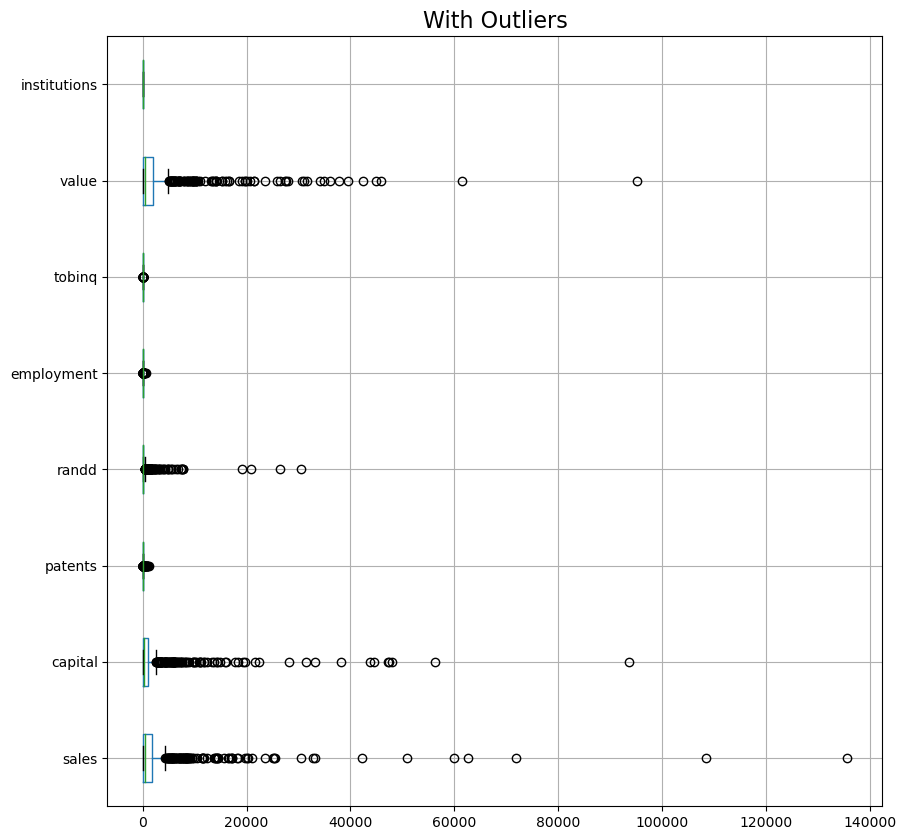

In [9]:
# Uni-Variate Analysis

# construct box plot for continuous variables
cont = fdf.dtypes[(fdf.dtypes!='uint8') & (fdf.dtypes!='bool') & (fdf.dtypes!='object') ].index
plt.figure(figsize=(10,10))
fdf[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [10]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [11]:
for column in fdf[cont].columns:
    lr,ur=remove_outlier(fdf[column])
    fdf[column]=np.where(fdf[column]>ur,ur,fdf[column])
    fdf[column]=np.where(fdf[column]<lr,lr,fdf[column])

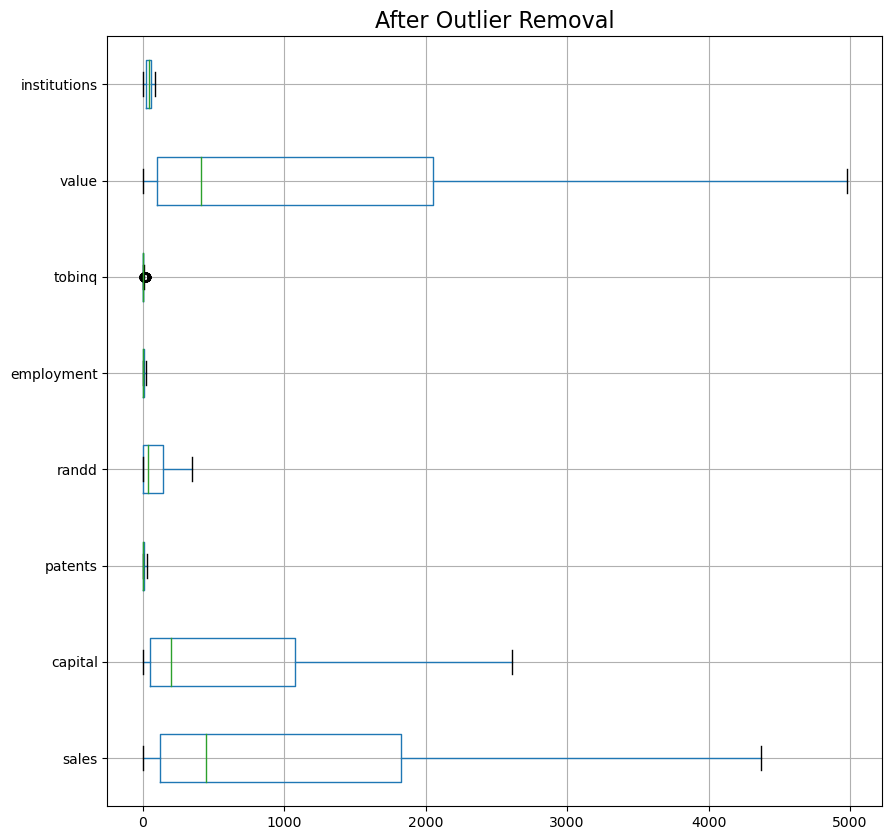

In [12]:
plt.figure(figsize=(10,10))
fdf[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

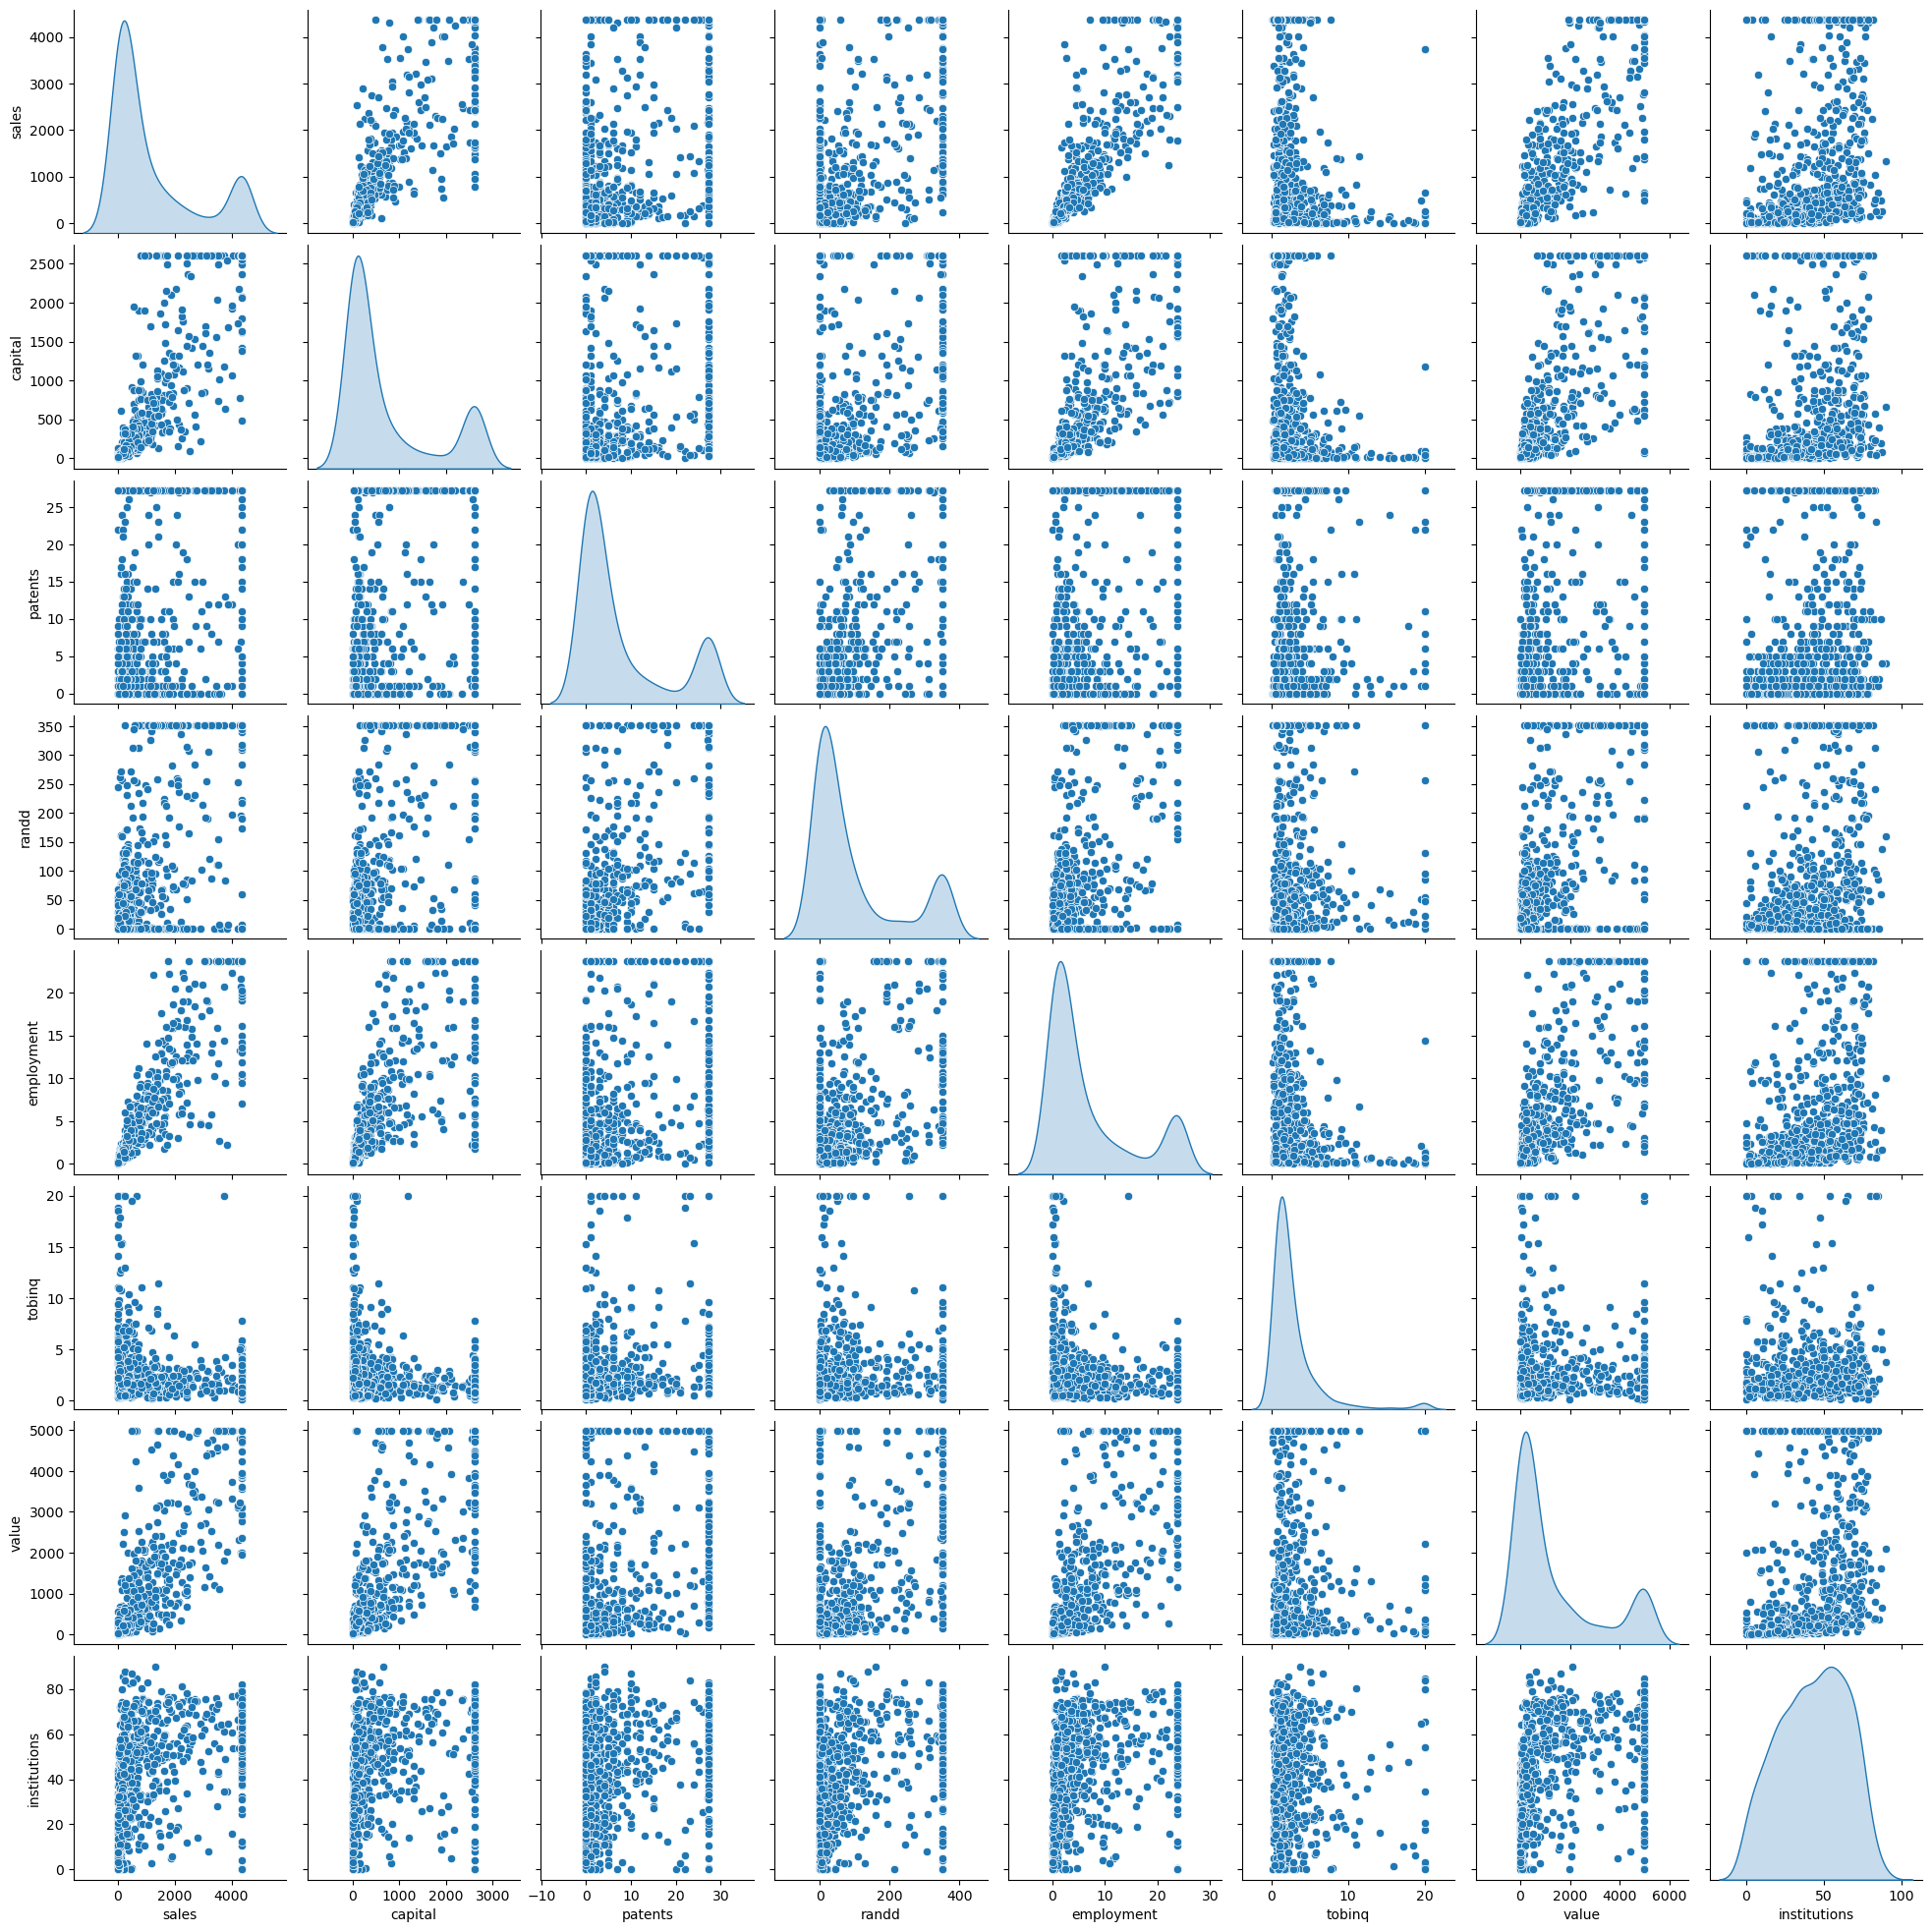

In [13]:
# Bi-Variate Analysis - Data Distribution

fdf_attr = (fdf[cont])
sns.pairplot(fdf_attr, diag_kind='kde')  
plt.show()

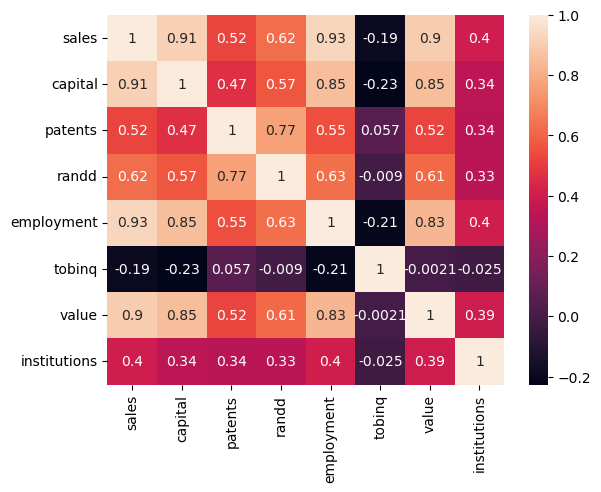

In [14]:
# Correlation Plot

sns.heatmap(fdf.corr(),annot=True)
plt.show()

The variable 'capital', 'value', 'employment' are having correlation with each other.

## 1.2	Impute null values if present. Do you think scaling is necessary in this case?

In [15]:
#imputing missing columns
for column in fdf.columns:
    if fdf[column].dtype != 'object':
        mean = fdf[column].mean()
        fdf[column] = fdf[column].fillna(mean)    
        
fdf.isnull().sum()   

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

In [16]:
fdf.describe(include="all")

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,759,759.000000,759.000000,759.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,542,NaN,NaN,NaN
mean,1236.090089,728.715785,7.800395,99.512662,6.925381,NaN,2.794910,1375.431494,43.020540
std,1528.690552,959.394531,9.952684,127.195056,8.184188,NaN,3.319629,1754.489690,21.685586
min,0.138000,0.057000,0.000000,0.000000,0.006000,NaN,0.119001,1.971053,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,NaN,1.036000,103.593946,25.395000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,NaN,1.741800,410.793529,44.110000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,NaN,3.082979,2054.160386,60.510000


In [17]:
#z-score scaling
from scipy.stats import zscore
from scipy import stats

scaled_fdf = fdf[cont].apply(zscore)


In [18]:
scaled_fdf.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions
0,-0.267788,-0.591504,0.221152,1.979986,-0.564800,2.488244,0.142598,1.718839
1,-0.542217,-0.632706,-0.583181,-0.782879,-0.619331,-0.588020,-0.645807,0.738279
2,2.052715,1.962722,1.955496,1.979986,2.055116,0.726568,2.055843,0.215929
3,-0.513909,-0.481679,-0.683723,-0.125658,-0.471265,-0.750485,-0.748521,-0.744789
4,-0.694622,-0.613908,-0.583181,-0.670901,-0.608694,-0.521972,-0.746022,0.297142


In [19]:
scaled_fdf.describe()

,sales,capital,patents,randd,employment,tobinq,value,institutions
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,2.662195e-17,1.287215e-17,5.046468e-18,-6.041135e-17,5.061096e-17,1.426176e-18,5.704703e-18,1.518329e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-8.090369e-01,-7.599994e-01,-7.842647e-01,-7.828786e-01,-8.460148e-01,-8.066183e-01,-7.833424e-01,-1.985139e+00
25%,-7.286655e-01,-7.051438e-01,-6.837231e-01,-7.464674e-01,-7.333453e-01,-5.302007e-01,-7.253826e-01,-8.133127e-01
50%,-5.154950e-01,-5.491838e-01,-4.826397e-01,-4.928638e-01,-4.892385e-01,-3.174464e-01,-5.501737e-01,5.027202e-02
75%,3.838867e-01,3.620024e-01,3.719644e-01,3.441139e-01,3.820391e-01,8.683495e-02,3.871077e-01,8.070334e-01
max,2.052715e+00,1.962722e+00,1.955496e+00,1.979986e+00,2.055116e+00,5.186254e+00,2.055843e+00,2.174741e+00


## 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [20]:
#unique values for categorical variables
for column in fdf.columns:
    if fdf[column].dtype == 'object':
        print(column.upper(),': ',fdf[column].nunique())
        print(fdf[column].value_counts().sort_values())
        print('\n')

SP500 :  2
yes    217
no     542
Name: sp500, dtype: int64




In [21]:
#Converting SP500  from 'yes' and 'no' to boolean
fdf.sp500.replace(['yes','no'],[True,False],inplace=True )

In [22]:
#Converting Categorical to dummy variables
fdf = pd.get_dummies(fdf, columns=['sp500'],drop_first=True)

In [23]:
fdf.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_True
0,826.995050,161.603986,10.00,351.191114,2.306000,11.049511,1625.453755,80.27,0
1,407.753973,122.101012,2.00,0.000000,1.860000,0.844187,243.117082,59.02,0
2,4371.988416,2610.499299,27.25,351.191114,23.733752,5.205257,4980.010044,47.70,1
3,451.000010,266.899987,1.00,83.540161,3.071000,0.305221,63.024630,26.88,0
4,174.927981,140.124004,2.00,14.233637,1.947000,1.063300,67.406408,49.46,0


In [24]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    float64
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   tobinq        759 non-null    float64
 6   value         759 non-null    float64
 7   institutions  759 non-null    float64
 8   sp500_True    759 non-null    uint8  
dtypes: float64(8), uint8(1)
memory usage: 48.3 KB


In [25]:
fdf.describe(include="all")

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_True
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,1236.090089,728.715785,7.800395,99.512662,6.925381,2.794910,1375.431494,43.020540,0.285903
std,1528.690552,959.394531,9.952684,127.195056,8.184188,3.319629,1754.489690,21.685586,0.452141
min,0.138000,0.057000,0.000000,0.000000,0.006000,0.119001,1.971053,0.000000,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,1.036000,103.593946,25.395000,0.000000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,1.741800,410.793529,44.110000,0.000000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,3.082979,2054.160386,60.510000,1.000000
max,4371.988416,2610.499299,27.250000,351.191114,23.733752,20.000000,4980.010044,90.150000,1.000000


In [26]:
scaled_final_fdf = fdf.apply(zscore)

In [27]:
scaled_final_fdf.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_True
0,-0.267788,-0.591504,0.221152,1.979986,-0.564800,2.488244,0.142598,1.718839,-0.632747
1,-0.542217,-0.632706,-0.583181,-0.782879,-0.619331,-0.588020,-0.645807,0.738279,-0.632747
2,2.052715,1.962722,1.955496,1.979986,2.055116,0.726568,2.055843,0.215929,1.580410
3,-0.513909,-0.481679,-0.683723,-0.125658,-0.471265,-0.750485,-0.748521,-0.744789,-0.632747
4,-0.694622,-0.613908,-0.583181,-0.670901,-0.608694,-0.521972,-0.746022,0.297142,-0.632747


In [28]:
scaled_final_fdf.describe()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_True
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,2.662195e-17,1.287215e-17,5.046468e-18,-6.041135e-17,5.061096e-17,1.426176e-18,5.704703e-18,1.518329e-16,-3.943559e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-8.090369e-01,-7.599994e-01,-7.842647e-01,-7.828786e-01,-8.460148e-01,-8.066183e-01,-7.833424e-01,-1.985139e+00,-6.327472e-01
25%,-7.286655e-01,-7.051438e-01,-6.837231e-01,-7.464674e-01,-7.333453e-01,-5.302007e-01,-7.253826e-01,-8.133127e-01,-6.327472e-01
50%,-5.154950e-01,-5.491838e-01,-4.826397e-01,-4.928638e-01,-4.892385e-01,-3.174464e-01,-5.501737e-01,5.027202e-02,-6.327472e-01
75%,3.838867e-01,3.620024e-01,3.719644e-01,3.441139e-01,3.820391e-01,8.683495e-02,3.871077e-01,8.070334e-01,1.580410e+00
max,2.052715e+00,1.962722e+00,1.955496e+00,1.979986e+00,2.055116e+00,5.186254e+00,2.055843e+00,2.174741e+00,1.580410e+00


In [29]:
# Train - Test Split

# Copy all the predictor variables into X dataframe
X = scaled_final_fdf.drop('sales', axis=1)

# Copy target into the y dataframe. 
y = scaled_final_fdf[['sales']]

In [30]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is 0.2691366426521997
The coefficient for patents is -0.03064281484816278
The coefficient for randd is 0.049503558795942926
The coefficient for employment is 0.42651667358010986
The coefficient for tobinq is -0.0352208638241435
The coefficient for value is 0.26522612079727126
The coefficient for institutions is 0.0013141653073709318
The coefficient for sp500_True is 0.049984486340708956


In [34]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0026850741836639165


In [35]:
# R square on training data
regression_model.score(X_train, y_train)

0.9354134324090398

In [36]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9231645685214456

In [37]:
from sklearn import metrics

In [38]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.2592475299509513

In [39]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.2633248972256875

In [40]:
# Linear Regression using statsmodel

# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,capital,patents,randd,employment,tobinq,value,institutions,sp500_True,sales
626,0.612227,0.723860,-0.206409,1.167240,-0.342854,0.488463,-0.532988,-0.632747,0.465498
333,-0.744145,-0.583181,-0.710087,-0.777545,-0.727415,-0.778833,-0.984276,-0.632747,-0.769637
257,-0.198723,1.226569,-0.095381,-0.036482,-0.201412,-0.203035,1.228328,-0.632747,-0.111504
173,0.081876,-0.784265,-0.240832,0.083340,0.107480,0.482702,1.230635,1.580410,-0.027782
242,-0.340238,-0.583181,-0.782879,-0.657234,-0.193077,-0.580261,1.956480,-0.632747,-0.701687


In [41]:
data_train.columns

Index(['capital', 'patents', 'randd', 'employment', 'tobinq', 'value',
       'institutions', 'sp500_True', 'sales'],
      dtype='object')

In [42]:
expr = 'sales ~ capital + patents + randd + employment + tobinq + value + institutions + sp500_True'


In [43]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       0.002685
capital         0.269137
patents        -0.030643
randd           0.049504
employment      0.426517
tobinq         -0.035221
value           0.265226
institutions    0.001314
sp500_True      0.049984
dtype: float64

In [44]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     945.0
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          6.95e-305
Time:                        21:45:18   Log-Likelihood:                -36.621
No. Observations:                 531   AIC:                             91.24
Df Residuals:                     522   BIC:                             129.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0027      0.011      0.236   

In [45]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

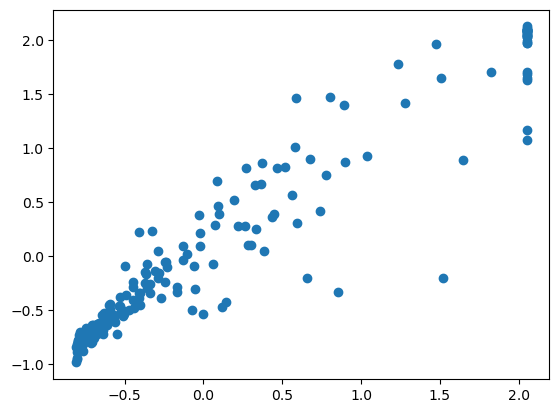

In [46]:
plt.scatter(y_test['sales'], y_pred)
plt.show()

## Problem 2:
    
## You are hired by the Government to do an analysis of car crashes. You are provided details of car crashes, among which some people survived some didn’t. You have to help the government in predicting whether a person will survive or not on the basis of the information given in the dataset to ensure safety measures. Also, find the important factors on the basis of which you made your predictions.

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [47]:
cdf = pd.read_csv("car_crash.csv")

print(f"Shape of the data: {cdf.shape}")

cdf.head()

Shape of the data: (11217, 16)


,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [48]:
# drop the column Unnamed: 0 as it is useless for the model
cdf = cdf.drop('Unnamed: 0',axis = 1)

In [49]:
print(f"Shape of the data: {cdf.shape}")

cdf

Shape of the data: (11217, 15)


,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2


In [50]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [51]:
# Are there any missing values ?
cdf.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [52]:
cdf.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dvcat,11217,5,10-24,5414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,11217.0,NaN,NaN,NaN,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
Survived,11217,2,survived,10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airbag,11217,2,airbag,7064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seatbelt,11217,2,belted,7849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frontal,11217.0,NaN,NaN,NaN,0.644022,0.47883,0.0,0.0,1.0,1.0,1.0
sex,11217,2,m,6048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ageOFocc,11217.0,NaN,NaN,NaN,37.427654,18.192429,16.0,22.0,33.0,48.0,97.0
yearacc,11217.0,NaN,NaN,NaN,2001.103236,1.056805,1997.0,2001.0,2001.0,2002.0,2002.0
yearVeh,11217.0,NaN,NaN,NaN,1994.177944,5.658704,1953.0,1991.0,1995.0,1999.0,2003.0


In [53]:
#imputing missing columns
for column in cdf.columns:
    if cdf[column].dtype != 'object':
        mean = cdf[column].mean()
        cdf[column] = cdf[column].fillna(mean)    
        
cdf.isnull().sum()   

dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
caseid         0
dtype: int64

In [54]:
# Are there any duplicates ?
cdups = cdf.duplicated()
print('Number of duplicate rows = %d' % (cdups.sum()))
#df[dups]

Number of duplicate rows = 0


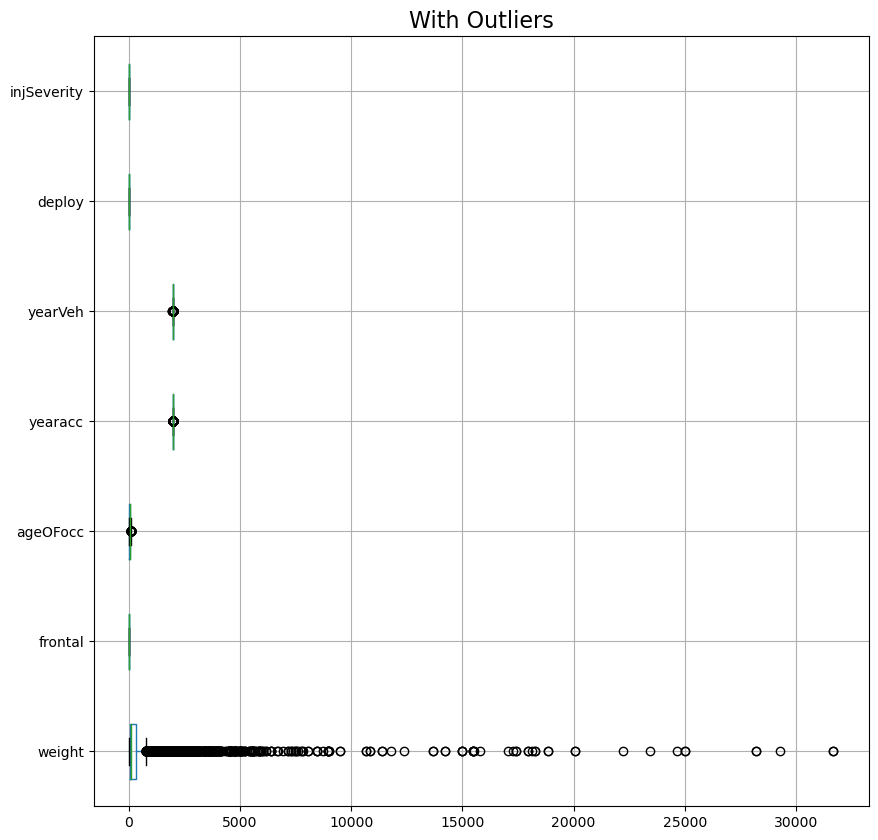

In [55]:
# Uni-Variate Analysis

# construct box plot for continuous variables
c_cont = cdf.dtypes[(cdf.dtypes!='uint8') & (cdf.dtypes!='bool') & (cdf.dtypes!='object') ].index
plt.figure(figsize=(10,10))
cdf[c_cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [56]:
for column in cdf[c_cont].columns:
    lr,ur=remove_outlier(cdf[column])
    cdf[column]=np.where(cdf[column]>ur,ur,cdf[column])
    cdf[column]=np.where(cdf[column]<lr,lr,cdf[column])

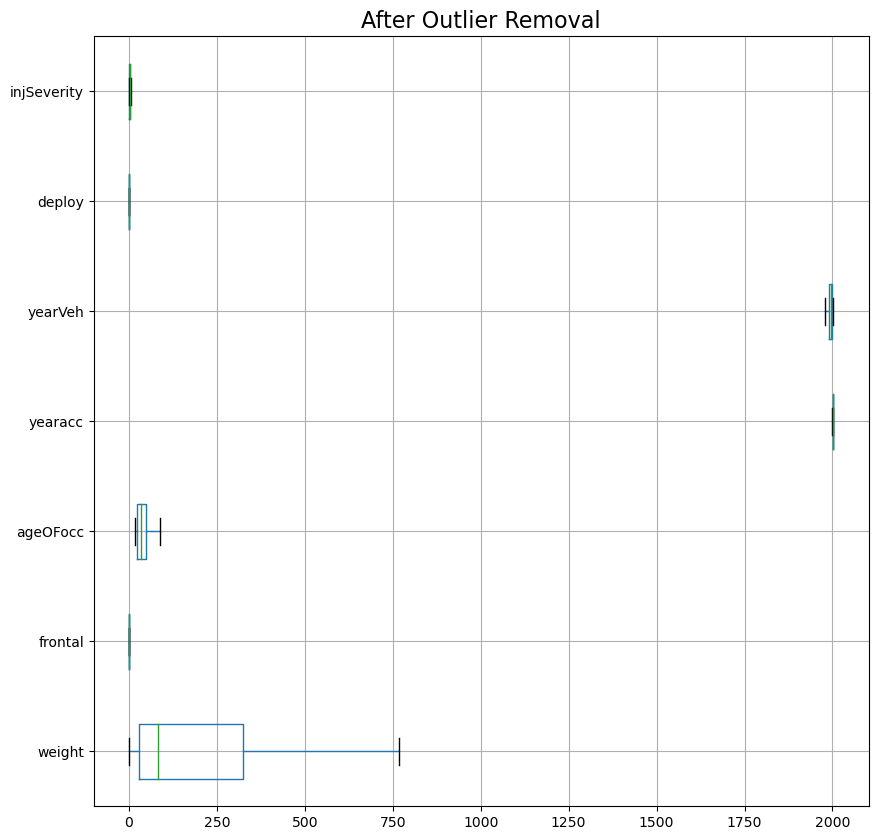

In [57]:
plt.figure(figsize=(10,10))
cdf[c_cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

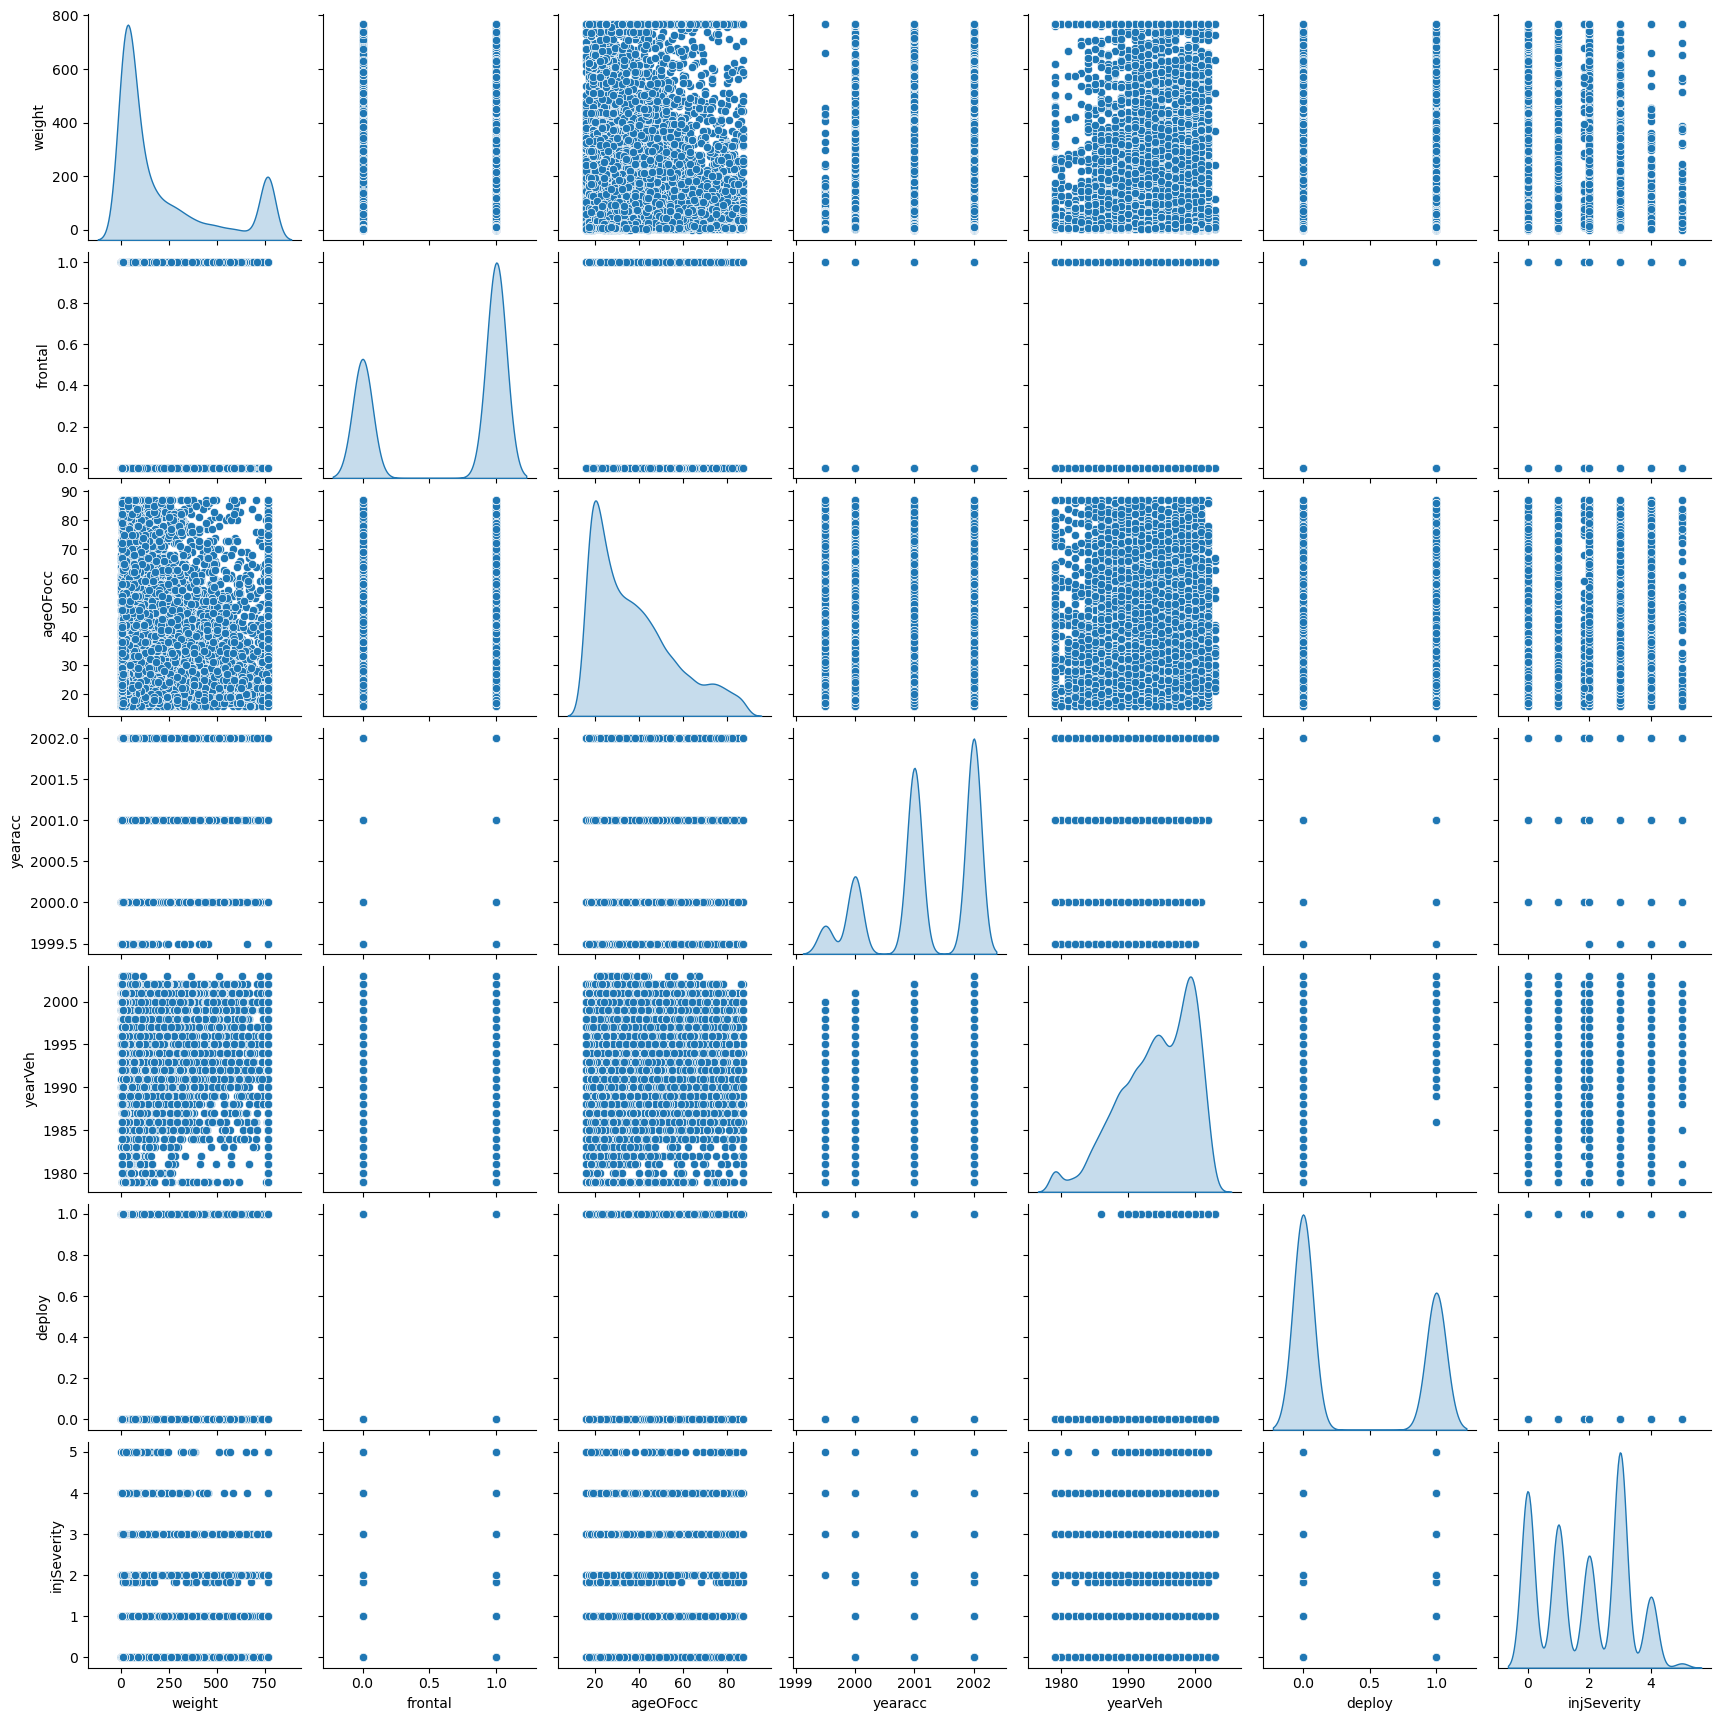

In [58]:
# Bi-Variate Analysis - Data Distribution

cdf_attr = (cdf[c_cont])
sns.pairplot(cdf_attr, diag_kind='kde')  
plt.show()

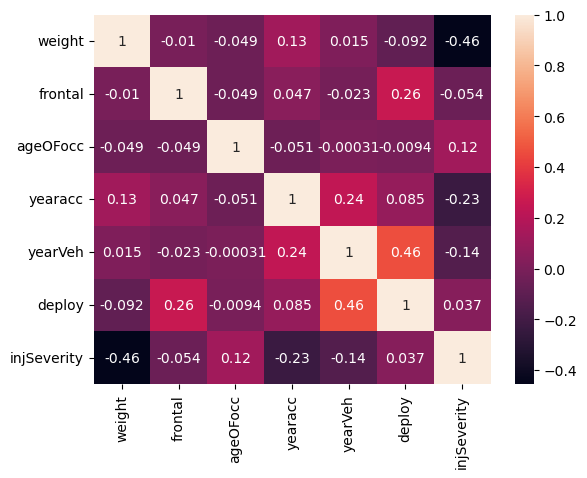

In [59]:
# Correlation Plot

sns.heatmap(cdf.corr(),annot=True)
plt.show()

## 2.2 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and Linear Discriminant Analysis (LDA).

In [60]:
#unique values for categorical variables
for column in cdf.columns:
    if cdf[column].dtype == 'object':
        print(column.upper(),': ',cdf[column].nunique())
        print(cdf[column].value_counts().sort_values())
        print('\n')

DVCAT :  5
1-9km/h     282
55+         809
40-54      1344
25-39      3368
10-24      5414
Name: dvcat, dtype: int64


SURVIVED :  2
Not_Survived     1180
survived        10037
Name: Survived, dtype: int64


AIRBAG :  2
none      4153
airbag    7064
Name: airbag, dtype: int64


SEATBELT :  2
none      3368
belted    7849
Name: seatbelt, dtype: int64


SEX :  2
f    5169
m    6048
Name: sex, dtype: int64


ABCAT :  3
nodeploy    2699
unavail     4153
deploy      4365
Name: abcat, dtype: int64


OCCROLE :  2
pass      2431
driver    8786
Name: occRole, dtype: int64


CASEID :  6488
2:95:1      1
45:49:1     1
45:88:1     1
45:42:2     1
45:34:1     1
           ..
74:58:1     6
49:106:1    6
75:84:2     6
74:74:2     6
73:100:2    7
Name: caseid, Length: 6488, dtype: int64




In [61]:
#Converting Categorical to dummy variables

#`caseid` is just an identifier, so drop it before encoding
cdf = cdf.drop('caseid',axis = 1)

# List of categorical columns to encode
categorical_cols = ['dvcat', 'Survived', 'airbag', 'seatbelt', 'sex', 'abcat', 'occRole']

# Convert categorical columns to dummy variables, drop_first=True to avoid multicollinearity
cdf = pd.get_dummies(cdf, columns=categorical_cols, drop_first=True)


# Check the new dataframe
print(cdf.head())


   weight  frontal  ageOFocc  yearacc  yearVeh  deploy  injSeverity  \
0  27.078      1.0      32.0   1999.5   1987.0     0.0          4.0   
1  89.627      0.0      54.0   1999.5   1994.0     0.0          4.0   
2  27.078      1.0      67.0   1999.5   1992.0     0.0          4.0   
3  27.078      1.0      64.0   1999.5   1992.0     0.0          4.0   
4  13.374      1.0      23.0   1999.5   1986.0     0.0          4.0   

   dvcat_10-24  dvcat_25-39  dvcat_40-54  dvcat_55+  Survived_survived  \
0            0            0            0          1                  0   
1            0            1            0          0                  0   
2            0            0            0          1                  0   
3            0            0            0          1                  0   
4            0            0            0          1                  0   

   airbag_none  seatbelt_none  sex_m  abcat_nodeploy  abcat_unavail  \
0            1              1      1               0     

In [62]:
cdf.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,11217.0,219.454706,261.963636,0.0,28.292,82.195,324.056,767.702
frontal,11217.0,0.644022,0.478830,0.0,0.000,1.000,1.000,1.000
ageOFocc,11217.0,37.408220,18.136557,16.0,22.000,33.000,48.000,87.000
yearacc,11217.0,2001.188553,0.816681,1999.5,2001.000,2001.000,2002.000,2002.000
yearVeh,11217.0,1994.247303,5.405095,1979.0,1991.000,1995.000,1999.000,2003.000
deploy,11217.0,0.389141,0.487577,0.0,0.000,0.000,1.000,1.000
injSeverity,11217.0,1.825583,1.373795,0.0,1.000,2.000,3.000,5.000
dvcat_10-24,11217.0,0.482660,0.499722,0.0,0.000,0.000,1.000,1.000
dvcat_25-39,11217.0,0.300259,0.458391,0.0,0.000,0.000,1.000,1.000
dvcat_40-54,11217.0,0.119818,0.324763,0.0,0.000,0.000,0.000,1.000


In [63]:
X = cdf.drop('Survived_survived',axis=1)
Y = cdf.Survived_survived
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
ytrain_predict = model1.predict(X_train)
y_predict = model1.predict(X_test)

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [67]:
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

#Build LDA Model
clf = LinearDiscriminantAnalysis()
model2=clf.fit(X_train,y_train)
model2

LinearDiscriminantAnalysis()

In [68]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model2.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model2.predict(X_test)

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Compare both the models and write inferences, which model is best/optimized.

In [69]:
# Accuracy - Training Data
train_model_score = model1.score(X_train, y_train)
print('Logistic Regression - Accuracy Score is on training data',train_model_score)

Logistic Regression - Accuracy Score is on training data 0.9817857597758247


In [70]:
# Accuracy - Testing Data
test_model_score = model1.score(X_test, y_test)
print('Logistic Regression - Accuracy Score is on test data',test_model_score)

Logistic Regression - Accuracy Score is on test data 0.9797979797979798


In [71]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

C:\Users\priya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


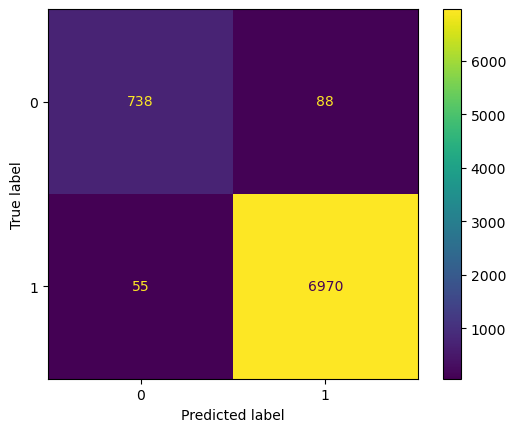

In [72]:
#Confusin Matrix - Training data - Logistic Regression
plot_confusion_matrix(model1,X_train,y_train);

C:\Users\priya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


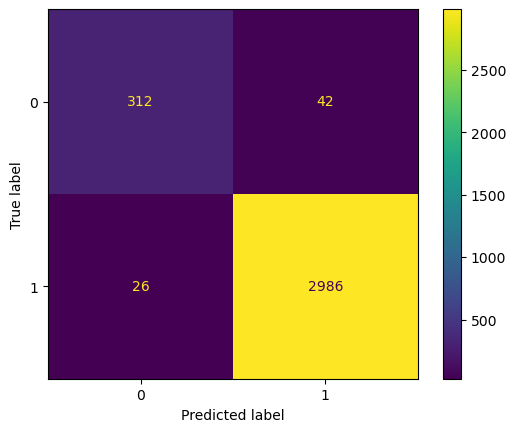

In [73]:
plot_confusion_matrix(model1,X_test,y_test);

In [74]:
print('Classification Report','\n',metrics.classification_report(y_train, ytrain_predict))

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       826
           1       0.99      0.99      0.99      7025

    accuracy                           0.98      7851
   macro avg       0.96      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851



In [75]:
print('Classification Report','\n',metrics.classification_report(y_test, y_predict))

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       354
           1       0.99      0.99      0.99      3012

    accuracy                           0.98      3366
   macro avg       0.95      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366



AUC: 0.988


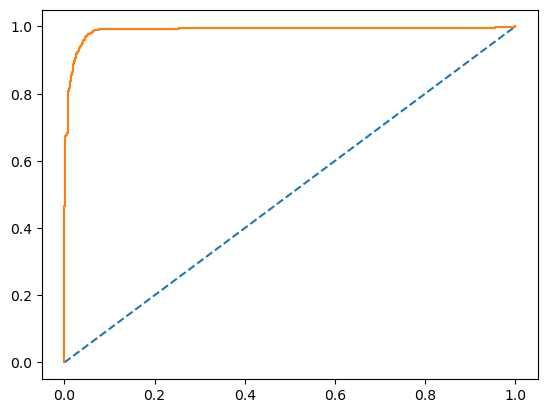

In [76]:
# AUC and ROC for the training data
# predict probabilities
probs = model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.988


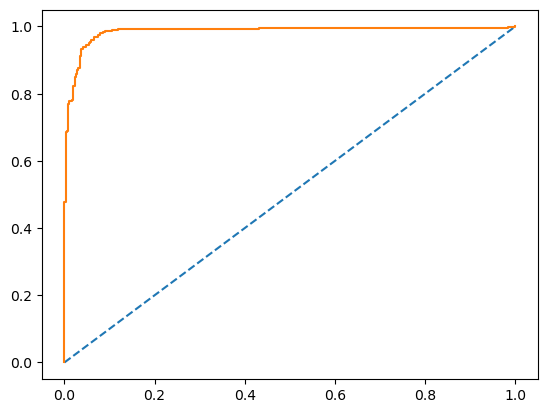

In [77]:
# predict probabilities
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [78]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [79]:
from sklearn.metrics import confusion_matrix

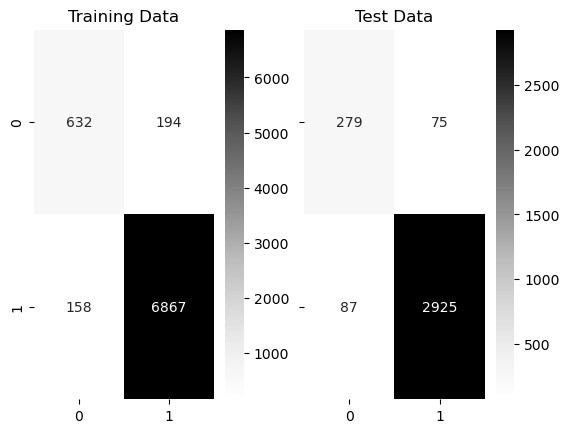

In [80]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [81]:
print('Classification Report of the training data - LDA:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data - LDA:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data - LDA:

               precision    recall  f1-score   support

           0       0.80      0.77      0.78       826
           1       0.97      0.98      0.98      7025

    accuracy                           0.96      7851
   macro avg       0.89      0.87      0.88      7851
weighted avg       0.95      0.96      0.95      7851
 

Classification Report of the test data - LDA:

               precision    recall  f1-score   support

           0       0.76      0.79      0.78       354
           1       0.97      0.97      0.97      3012

    accuracy                           0.95      3366
   macro avg       0.87      0.88      0.87      3366
weighted avg       0.95      0.95      0.95      3366
 



In [82]:
# Training Data Probability Prediction
pred_prob_train = model2.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model2.predict_proba(X_test)

AUC for the Training Data - LDA: 0.969
AUC for the Test Data - LDA: 0.971


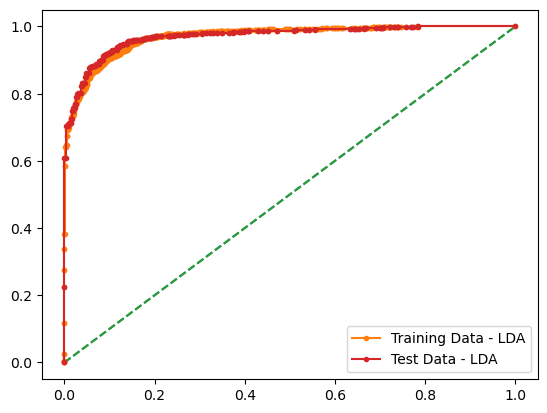

In [83]:
# AUC and ROC for the training data - LDA

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data - LDA: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data - LDA')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data - LDA: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data - LDA')
# show the plot
plt.legend(loc='best')
plt.show()